Name : **NGUIMATSIA TIOFACK Franki**


## Code for Homework 3
For mathematical prove and comment, see the second pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import pandoc

In [2]:
def centering_step(Q, p, A, b, t, v0, eps):
    def f(v):
        return t * (v.T @ Q @ v + p.T @ v) - np.sum(np.log(b - A @ v))
    
    def grad_f(v):
        return t * (2 * Q @ v + p) + A.T @ (1 / (b - A @ v))
    
    def hess_f(v):
        diag_terms = 1 / ((b - A @ v) ** 2)
        return 2 * t * Q + A.T @ np.diag(diag_terms) @ A

    v = v0
    v_seq = []
    while True:
        grad = grad_f(v)
        hess = hess_f(v)
        delta_v = np.linalg.solve(hess, -grad)
        lambda_sq = -grad.T @ delta_v
        if lambda_sq / 2 <= eps:
            break
        # Backtracking line search
        alpha = 0.2
        beta = 0.5
        st = 1
        while np.min(b - A @ (v + st * delta_v)) <= 0 or f(v + st * delta_v) >= f(v) + alpha * st * grad.T @ delta_v :
            st *= beta
        v += st * delta_v
        v_seq.append(v)
    return v_seq

In [3]:
def barr_method(Q, p, A, b, v0, eps, mu):
    m = len(b)
    t = 0.5
    v = v0
    v_seq = []
    num_New_step = []
    while m / t >= eps:
        centering = centering_step(Q, p, A, b, t, v, eps)
        v = centering[-1]
        v_seq.append(list(v))
        num_New_step.append(len(centering))
        t *= mu
    return v_seq, num_New_step 

In [4]:
n, d = 100, 10  # Dimensions des données
X = 7*np.random.randn(n, d)
y = -5 + 1.5*np.random.randn(n)
lambda_val = 10

In [5]:
Q = 0.5 * np.eye(n)
p = - y
A = np.concatenate([X.T, -X.T])
b = lambda_val * np.ones(2 * d)


In [6]:
def objective_function(v, Q, p):
    return  v.T @ Q @ v + p.T @ v

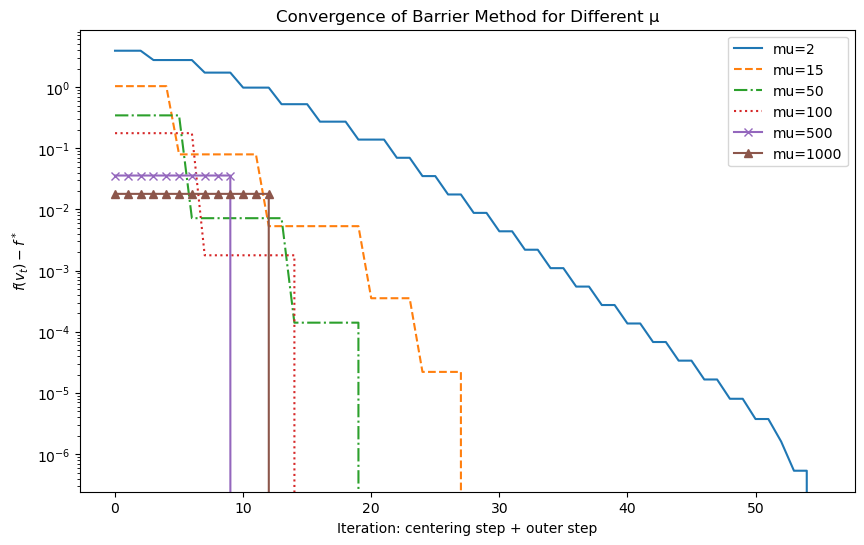

In [7]:

mu_values = [2, 15, 50, 100, 500, 1000] 
line_styles = ['-', '--', '-.', ':', 'x-', '^-']


plt.figure(figsize=(10, 6))  

for mu, style in zip(mu_values, line_styles):
    v0 = np.zeros(len(p))  
    eps = 1e-6  
    v_seq, num_New_step = barr_method(Q, p, A, b, v0, eps, mu) 
    
    f_vals = [objective_function(np.array(v), Q, p) for v in v_seq]
    f_valss = []
    for i in range(1, len(f_vals)-1):
        f_valss.extend([f_vals[i]] * num_New_step[i])
    f_valss.extend([f_vals[-1]])
    
    plt.semilogy(np.array(f_valss) - f_vals[-1], style, label=f"mu={mu}")

plt.xlabel("Iteration: centering step + outer step")
plt.ylabel('$f(v_t) - f^*$')
plt.title("Convergence of Barrier Method for Different µ")
plt.legend()

plt.savefig("convergence_barrier_method.png")
plt.show()

#### Impact of $\mu$ on $w$ 
See Pdf for explanaition   $w^* = X^+(y - v^*) $

In [8]:
mu_values = [2, 15, 50, 100, 500, 1000]
ws = []
for mu in mu_values:
    v_seq, num_New_step = barr_method(Q, p, A, b, v0, eps, mu) 
    v = v_seq[-1]
    # Compute w from v*
    ws.append(list(np.dot(np.linalg.pinv(X),(y-v))))

In [9]:
# Convertir la liste des w en une matrice
W = np.array(ws)

# Calculer les différences entre les w consécutifs
diffs = np.diff(W, axis=0)

# Calculer la norme de chaque différence
norms = np.linalg.norm(diffs, axis=1)

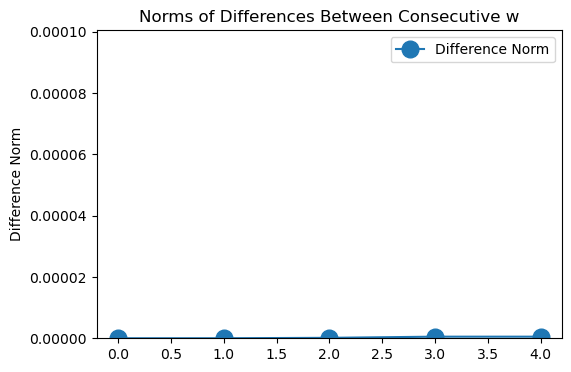

In [10]:

plt.figure(figsize=(6, 4))
plt.plot(norms, marker='o', markersize=12, label="Difference Norm")
plt.ylabel('Difference Norm')
plt.title('Norms of Differences Between Consecutive w')

# Set the scale of the y-axis
plt.ylim([0, max(norms) + 0.0001])  # Adjust based on your data
plt.legend()
plt.savefig("w.png")
plt.show()